In [6]:
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



## 1.4. Изучите распределение года постройки

In [7]:
df=pd.read_csv("kc_house_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Задача 1
## Постройте график. Назовите график.Сделайте именование оси x и оси y. Сделайте выводы
## 1.2. Изучите стоимости недвижимости

Text(0.5, 1.0, 'Распределение недвижимости по стоимости')

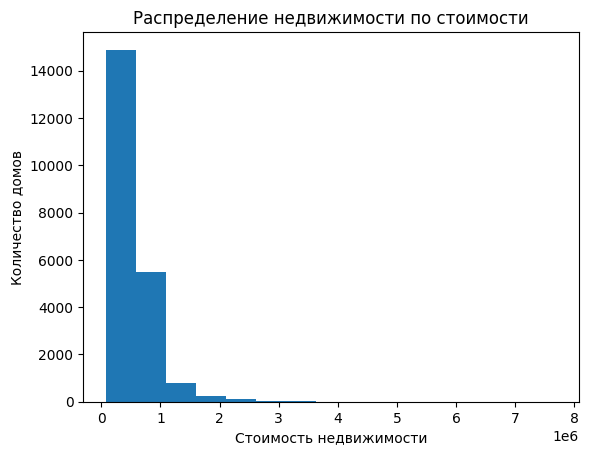

In [8]:
plt.hist(df['price'], bins=15)
plt.xlabel("Стоимость недвижимости")
plt.ylabel("Количество домов")
plt.title("Распределение недвижимости по стоимости")

Около 15000 домов стоят до 0,5 млн. Около 5000 домов имеют стоимость выше и стоят от 0,5 до 1 млн. Стоимость остальной части домов распределена вплоть до 8 млн и имеет малую долю.

## 1.3. Изучите распределение квадратуры жилой

Text(0.5, 1.0, 'Распределение недвижимости по жилой площади')

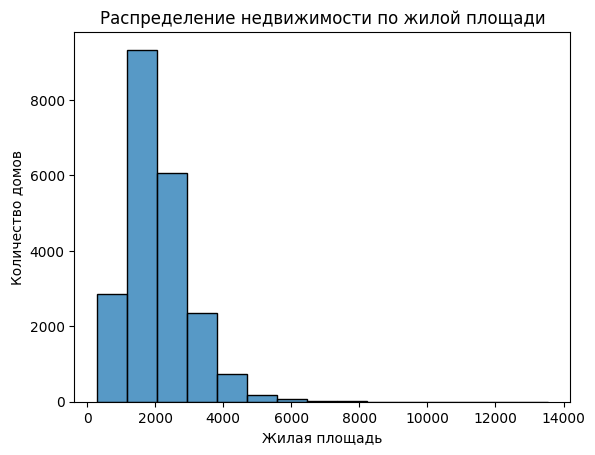

In [16]:
sns.histplot(df['sqft_living'], bins=15)
plt.xlabel("Жилая площадь")
plt.ylabel("Количество домов")
plt.title("Распределение недвижимости по жилой площади")


Вывод: Наибольшее количество домов имеют жилую площадь от 1000 до 2000. На втором месте (6000 домов) имеют площадь от 2000 до 3000 и т.д. Дома распределены по площади вплоть до 14000, что имеюет очень малую долю в общем распределении.

# 2 задача
## 2.1. Изучите распределение домов от наличия вида на набережную. Постройте график. Сделайте выводы


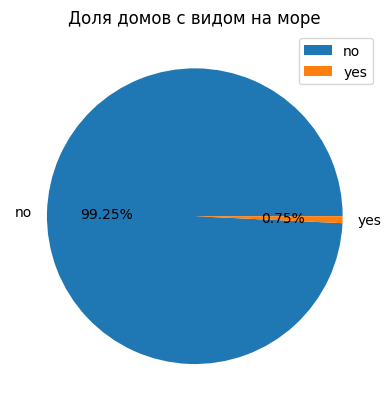

In [22]:
data_1=df['waterfront'].value_counts()
data_1.index=['no', 'yes']
plt.pie(data_1.values, labels=data_1.index, autopct='%.2f%%')
plt.title("Доля домов с видом на море")
plt.legend(data_1.index)


Вывод: 99.25% домов без вида на набережную.

## 2.2. Изучите распределение этажей домов

Text(0, 0.5, 'Количество домов')

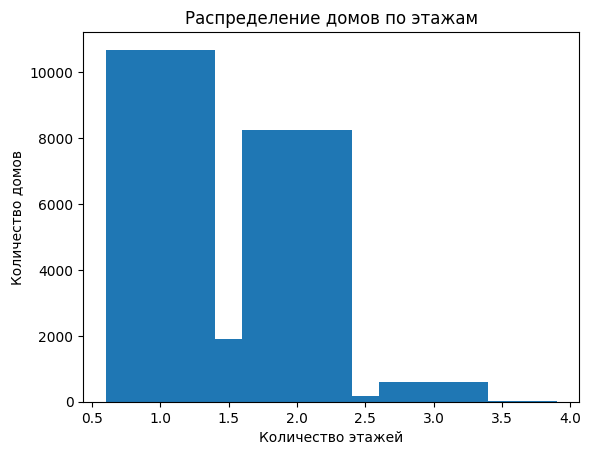

In [30]:
data_2=df['floors'].value_counts()
plt.bar(data_2.index, data_2.values)
plt.title("Распределение домов по этажам")
plt.xlabel("Количество этажей")
plt.ylabel("Количество домов")

Вывод: более 10000 домов имеют количество этажей между 0,5 и 1,5. 8000 домов имеют количество этадей между 1,5 до 2,5. и т.д.

## 2.3. Изучите распределение состояния домов

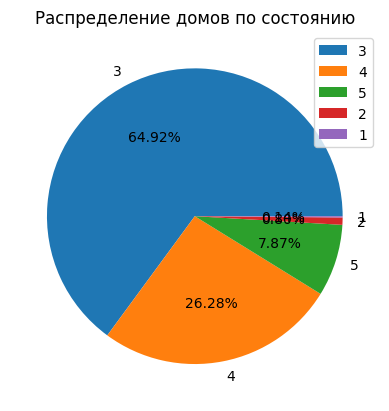

In [31]:
data_3=df['condition'].value_counts()
plt.pie(data_3.values, labels=data_3.index, autopct='%.2f%%')
plt.title("Распределение домов по состоянию")
plt.legend(data_3.index)

Вывод: Наибольшая доля домов (64,92%) имеет среднюю оценку состояния 3. Наименьшее количество домов (менее 0,1%) имеет плохую оценку состояния 1. Остальные дома распределены по оценкам состояния 2, 4, 5. 

# 3 задача
## Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока. Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

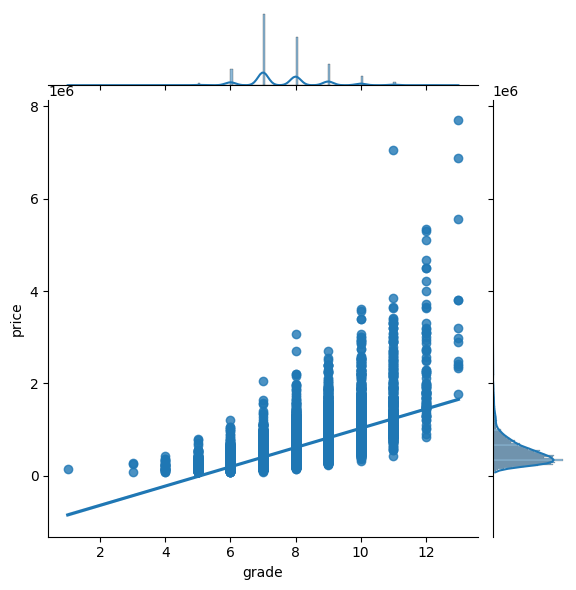

In [34]:
sns.jointplot(x=df['grade'], y=df['price'], kind='reg')

С повышением оценки увеличивается стоимость дома, но и разброс по стоимости также.

Text(0.5, 1.0, 'Зависимость цены от вида')

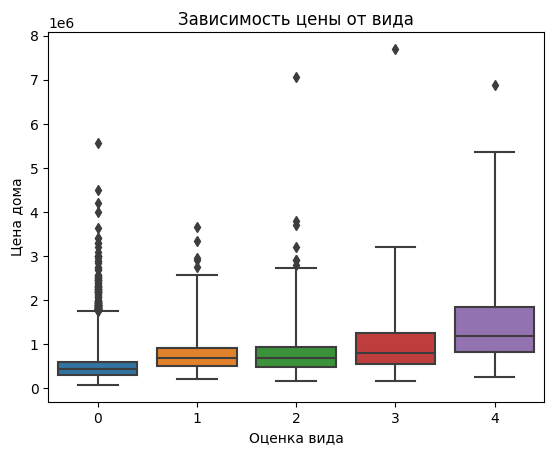

In [59]:
sns.boxplot(x=df["view"], y=df["price"], whis=4)
plt.xlabel("Оценка вида")
plt.ylabel("Цена дома")
plt.title("Зависимость цены от вида")

Вывод: оценка вида незначительно влияет на стоимость дома. У домов с самой низкой оценкой вида большое количество выбросов, т.е. есть большой разброс по ценам

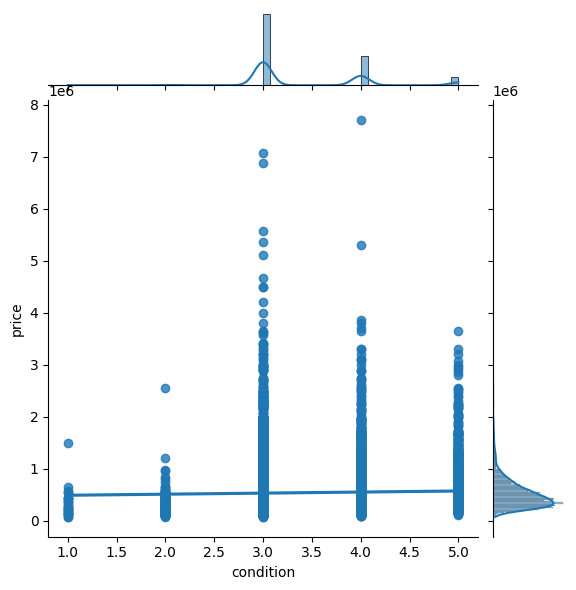

In [55]:
sns.jointplot(x=df['condition'], y=df['price'], kind='reg')

Вывод: отсутствует линейная зависимость условий от цены. Большой разброс условий у домов со средней стоимостью

Text(0.5, 1.0, 'Зависимость цены от количества спален')

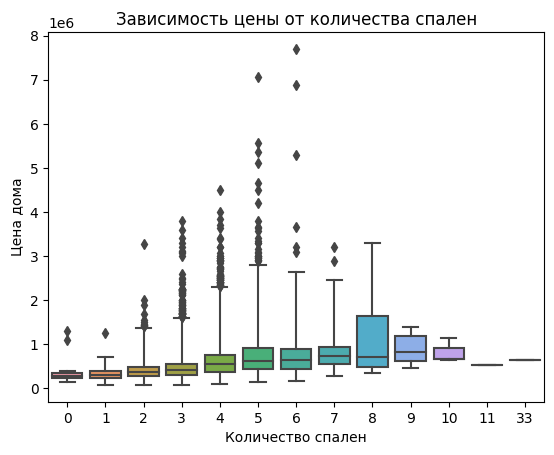

In [60]:
sns.boxplot(x=df["bedrooms"], y=df["price"], whis=4)
plt.xlabel("Количество спален")
plt.ylabel("Цена дома")
plt.title("Зависимость цены от количества спален")

Вывод: не наблюдается большой зависимости цены дома от количества спален: у дешевых домов может быть разное количество спален. Цена домов с количество спален 5-6 может иметь большой разброс.

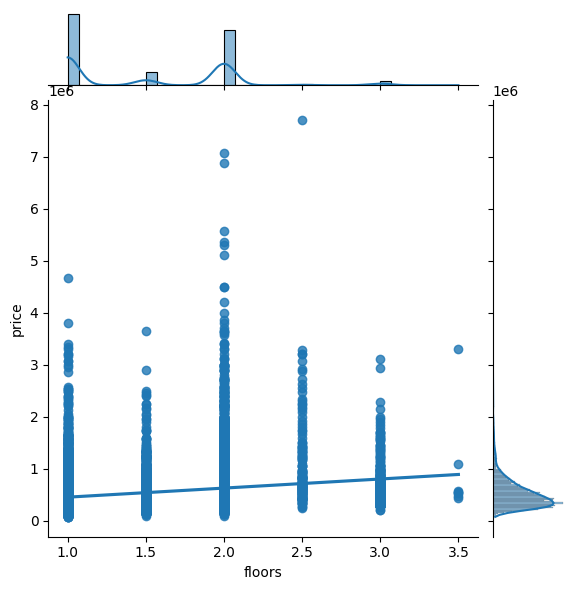

In [61]:
sns.jointplot(x=df['floors'], y=df['price'], kind='reg')

Выводы: также наблюдается большой разброс по цене у домов с 2-3 этажами.